# Feature Engineering

### Features to add:
    - Sentiment polarity (how positive the description is)
    - Sentiment subjectivity (how factual the description is)
    - Distance to Downtown Minneapolis
    - Bathrooms per sq. ft.
    - Bedrooms per sq. ft.

In [75]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

In [76]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [77]:
dataframe = pd.read_csv('filtered_data.csv')

In [78]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,lotSize,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_stru

# Sentiment Analysis

In [79]:
test = " Welcome to the charm of Afton! Country feel with convenience of Woodbury and downtown Afton. This property has plenty of space to roam with its 16.68 Acres; add a pole barn, plant gardens or just enjoy the peace and privacy. Spacious 3 car garage with huge walk up attic storage, heated and insulated too. Classic home features main level laundry and &frac12; bath, 3 bedrooms up; large owners suite includes sitting area, two closets and private bath. Unfinished lower level could be finished with additional bedroom, family room and bath; bring your imagination. Newer windows, upgraded appliances, and utilities. Imagine grill outs on the deck, bonfires &amp; fun in the backyard.  Welcome Home! We are practicing safety and health guidelines put forth by the CDC so you can feel confident about in-person showings which the seller is allowing. We are also happy to offer virtual showings at request."

TextBlob(test).sentiment

Sentiment(polarity=0.44978354978354973, subjectivity=0.5942640692640692)

In [80]:
dataframe['descPolarity'] = 0.0
dataframe['descSubjectivity'] = 0.0

In [81]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,lotSize,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_stru

In [82]:
for index, row in dataframe.iterrows():
    desc = dataframe.at[index, "description"]
    sentiment = TextBlob(desc).sentiment
    dataframe.at[index, "descPolarity"] = sentiment.polarity
    dataframe.at[index, "descSubjectivity"] = sentiment.subjectivity

In [83]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,lotSize,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_stru

In [84]:
dataframe = dataframe.drop("description", axis=1)

In [85]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,lotSize,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureType_Ca

In [86]:
def distToDowntownMinneapolis(lat, long):
    return np.sqrt((lat - 44.9765) ** 2 + (long + 93.2761) ** 2)

In [87]:
dataframe['distToDowntown'] = 0.0
dataframe['bathPerSqft'] = 0.0
dataframe['bedPerSqft'] = 0.0

In [88]:
for index, row in dataframe.iterrows():
    latitude = dataframe.at[index, "latitude"]
    longitude = dataframe.at[index, "longitude"]
    livingArea = dataframe.at[index, "livingArea"]
    bath = dataframe.at[index, "bathrooms"]
    bed = dataframe.at[index, "bedrooms"]
    dataframe.at[index, "distToDowntown"] = distToDowntownMinneapolis(latitude, longitude)
    dataframe.at[index, "bathPerSqft"] = bath / livingArea
    dataframe.at[index, "bedPerSqft"] = bed / livingArea

In [89]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,lotSize,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureType_Ca

# PCA

In [90]:
numeric_data = dataframe[["bedrooms", "bathrooms", "bathroomsFull", "bathroomsThreeQuarter", "bathroomsHalf",
                                "bathroomsOneQuarter", "livingArea", "garageSpaces", "stories", "lotSize", "zipcode",
                                "latitude", "longitude", "photoCount", "descPolarity", "descSubjectivity", "distToDowntown", 
                                "bathPerSqft", "bedPerSqft"]]
numeric_data.head()

,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,livingArea,garageSpaces,stories,lotSize,zipcode,latitude,longitude,photoCount,descPolarity,descSubjectivity,distToDowntown,bathPerSqft,bedPerSqft
0,3,3,0.0,0.0,0.0,0.0,1654.0,4.0,2.0,16.68,55001,44.919717,-92.845776,7,0.449784,0.594264,0.434054,0.001814,0.001814
1,3,1,1.0,0.0,0.0,0.0,1721.0,2.0,1.0,40.75,55001,44.939099,-92.847974,26,0.000000,0.000000,0.429757,0.000581,0.001743
2,4,6,2.0,2.0,2.0,0.0,5392.0,3.0,2.0,3.34,55001,44.910042,-92.796045,14,0.353623,0.664787,0.484633,0.001113,0.000742
3,3,4,1.0,1.0,2.0,0.0,4480.0,3.0,1.0,5.24,55001,44.934352,-92.809364,12,0.319970,0.535400,0.468635,0.000893,0.000670
4,5,5,2.0,2.0,1.0,0.0,5360.0,0.0,0.0,5.00,55001,44.905087,-92.817662,12,0.445938,0.693347,0.463967,0.000933,0.000933


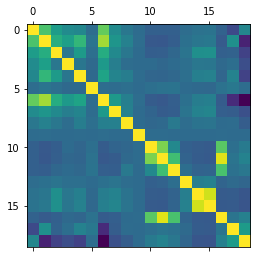

In [91]:
plt.matshow(numeric_data.corr())
plt.show()